# Pokemon Data Visualisation Project
### Muhammad Ahmed

## 1. Imports

In [1443]:
%matplotlib inline
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator


sns.set(style="ticks", color_codes=True)


import builtins
dir(builtins)

color = sns.color_palette() 



#### Importing Pokemon CSV Data File

In [1444]:
pk = pd.read_csv('https://gist.githubusercontent.com/mcaiox/0d06d87a5e907830527af4f26b3ac326/raw/9f81b7303e8a7778550fbf9927fbed60415cf6ab/Pokemon.csv)

#If unable to load the above dataset,uncomment below to access dataset locally.
#pk = pd.read_csv(./Pokemon.csv)


#### Preview of the raw dataset 

In [1445]:
pk.head(25)

,Number,Name,Type1,Type2,Total,HP,Attack,Defense,SpecialAtk,SpecialDef,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


## 2. Data Cleaning and Preprocessing

#### Assigning easier to read and more accurate columns

In [1389]:
pk.rename(index=str,inplace=True, columns={
    "Name":"Pokemon",
    "Defense": "Defence",
    "SpecialAtk" : "Sp.Atk",
    "SpecialDef" : "Sp.Def",
    "Number" : "NPN" #NPN = National Pokédex number
                             }
         )

In [1390]:
pk.head()

,NPN,Pokemon,Type1,Type2,Total,HP,Attack,Defence,Sp.Atk,Sp.Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


#### Setting Index range to start from 1 to match Pokemon Number 

In [1391]:
pk.index = pd.RangeIndex(1,1 + len(pk))


In [1392]:
pk.head()

,NPN,Pokemon,Type1,Type2,Total,HP,Attack,Defence,Sp.Atk,Sp.Def,Speed,Generation,Legendary
1,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
4,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
5,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


#### Assigning the index column to Pokemon Name

In [1393]:
pk['Pokemon'].is_unique

True

In [1394]:
pk.set_index('Pokemon', drop = False, inplace=True)

#### Mega Pokemon contained extra and repetitive text. Removed all the text before "Mega"  

In [1395]:
pk.Pokemon = pk.Pokemon.str.replace(".*(?=Mega)", "")


In [1396]:
pk

,NPN,Pokemon,Type1,Type2,Total,HP,Attack,Defence,Sp.Atk,Sp.Def,Speed,Generation,Legendary
Pokemon,,,,,,,,,,,,,
Bulbasaur,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
Venusaur,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
Mega Venusaur,3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
Charmander,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
Charmeleon,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
Charizard,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
Mega Charizard X,6,Mega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
Mega Charizard Y,6,Mega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False


#### The mega pokemon have the same index and they have been dropped below 

In [1397]:
pk.drop_duplicates('NPN', keep='first', inplace=True)

## 3. Setting types correctly

In [1398]:
pk.get_dtype_counts()

bool      1
int64     9
object    3
dtype: int64

In [1399]:
pk['Pokemon'] = pk['Pokemon'].astype('category')
pk['Type1'] = pk['Type1'].astype('category')
pk['Type2'] = pk['Type2'].astype('category')
gen = [1,2,3,4,5,6,7]
pk['Generation'] = pk['Generation'].astype(CategoricalDtype(categories=gen, ordered=True))



In [1400]:
pk.get_dtype_counts()

bool        1
category    4
int64       8
dtype: int64

In [1401]:
pk.dtypes

NPN              int64
Pokemon       category
Type1         category
Type2         category
Total            int64
HP               int64
Attack           int64
Defence          int64
Sp.Atk           int64
Sp.Def           int64
Speed            int64
Generation    category
Legendary         bool
dtype: object

## 4. Visualisation of Basic Variables

#### Univariate Viz - Nominal

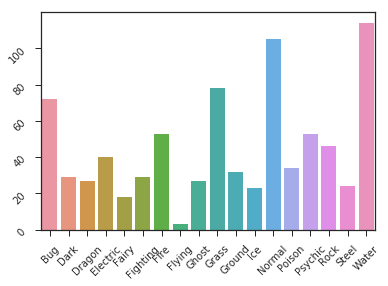

In [1402]:
#Bar Plot
#plt.figure(figsize = (10,20))
ax = sns.countplot(x = "Type1", data= pk)
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.xlabel("")
plt.ylabel("")
plt.title("")
plt.show()
plt.savefig("a.png")

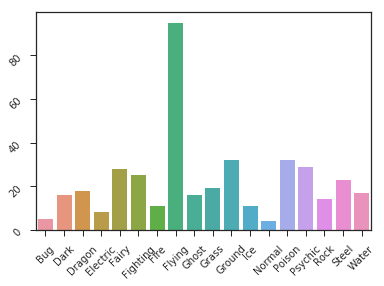

In [1403]:
#Bar Plot
#plt.figure(figsize = (10,10))
bx = sns.countplot(x= "Type2", data=pk)
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.xlabel("")
plt.ylabel("")
plt.title("")
plt.show()
plt.savefig("a2.png")

#### Univariate Viz - Ordinal

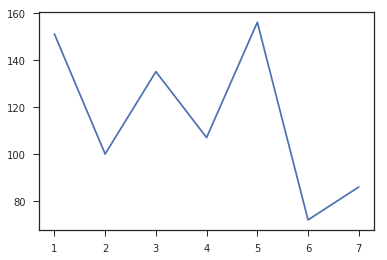

In [1404]:
pk['Generation'].value_counts().sort_index().plot.line()
plt.savefig("a4a.png")

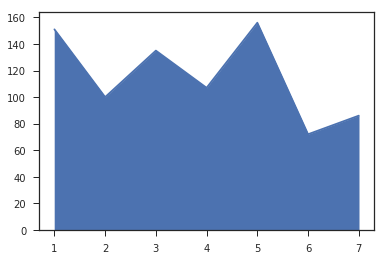

In [1405]:
pk['Generation'].value_counts().sort_index().plot.area()
plt.savefig("a4b.png")

#### Bivariate Viz - Discrete

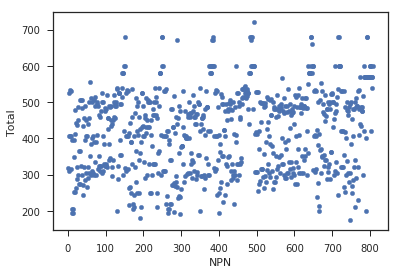

In [1406]:
pk.sort_index().plot.scatter(x='NPN', y='Total')
#You can see where each generation ends as each generation of pokemon have the legendary pokemon at the end of the pokedex.
plt.savefig("a5.png")

#### Univariate Viz - Continuous 

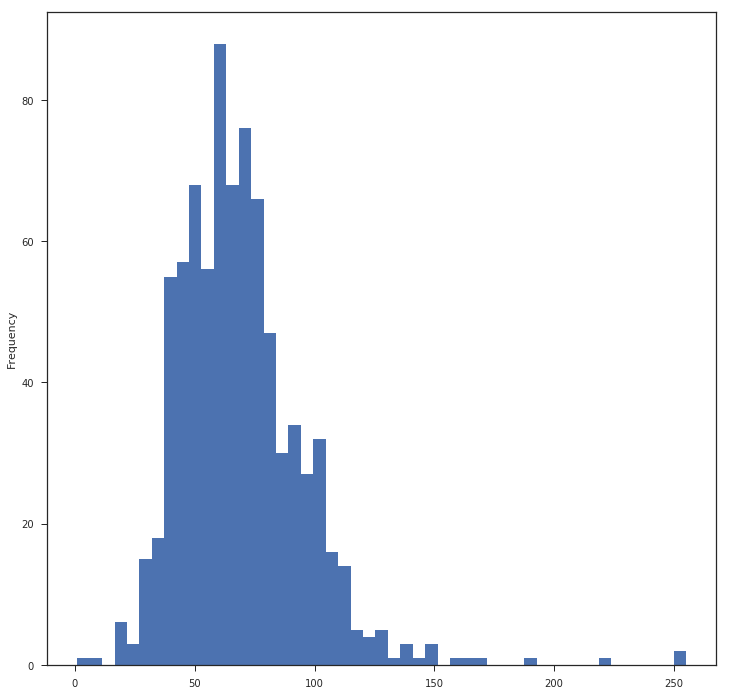

In [1407]:
pk.HP.plot(kind ='hist', bins = 49, figsize =(12,12))
plt.savefig("a6.png")

#### Univariate Viz - Boolean

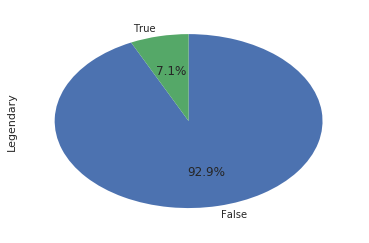

In [1408]:
pk['Legendary'].value_counts().sort_index().plot.pie(
autopct='%1.1f%%',
startangle=90,
counterclock=False,
)
plt.savefig("a7.png")

In [1448]:
pk['HP'].median()

66.0

In [1410]:
pk.corr()

,NPN,Total,HP,Attack,Defence,Sp.Atk,Sp.Def,Speed,Legendary
NPN,1.000000,0.179634,0.102656,0.168486,0.136726,0.138868,0.122723,0.028751,0.149127
Total,0.179634,1.000000,0.644837,0.708631,0.608231,0.722817,0.698550,0.538582,0.456182
HP,0.102656,0.644837,1.000000,0.436054,0.233701,0.373727,0.367367,0.170197,0.249284
Attack,0.168486,0.708631,0.436054,1.000000,0.439312,0.334526,0.204543,0.334722,0.269633
Defence,0.136726,0.608231,0.233701,0.439312,1.000000,0.198851,0.501031,-0.024748,0.270586
Sp.Atk,0.138868,0.722817,0.373727,0.334526,0.198851,1.000000,0.481602,0.437086,0.374614
Sp.Def,0.122723,0.698550,0.367367,0.204543,0.501031,0.481602,1.000000,0.206097,0.355581
Speed,0.028751,0.538582,0.170197,0.334722,-0.024748,0.437086,0.206097,1.000000,0.268484
Legendary,0.149127,0.456182,0.249284,0.269633,0.270586,0.374614,0.355581,0.268484,1.000000


In [1411]:
pk.nunique()

NPN           807
Pokemon       807
Type1          18
Type2          18
Total         190
HP             98
Attack        107
Defence       106
Sp.Atk        103
Sp.Def         95
Speed         111
Generation      7
Legendary       2
dtype: int64

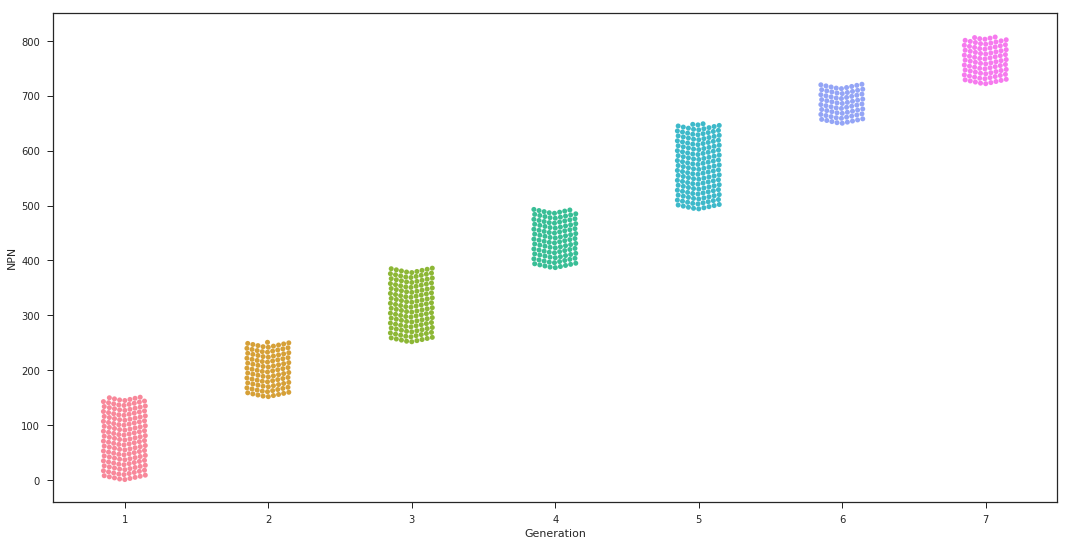

In [1412]:
#Swarm Plot
plt.figure(figsize=(18,9)) 
sns.swarmplot(x = "Generation",y = "NPN", data = pk)
plt.savefig("1.png")

In [1413]:
pk['Generation'].value_counts().sort_index()

1    151
2    100
3    135
4    107
5    156
6     72
7     86
Name: Generation, dtype: int64

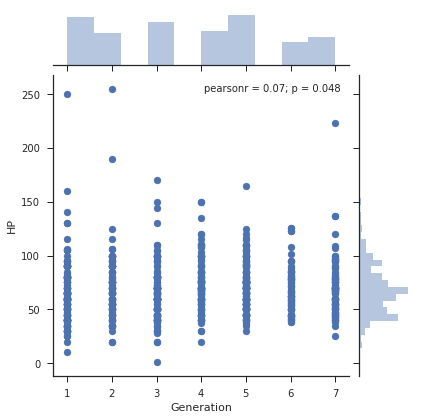

In [1414]:
plt.figure(figsize=(12,6)) 
sns.jointplot(x="Generation", y="HP", data=pk)
plt.savefig("2.png")

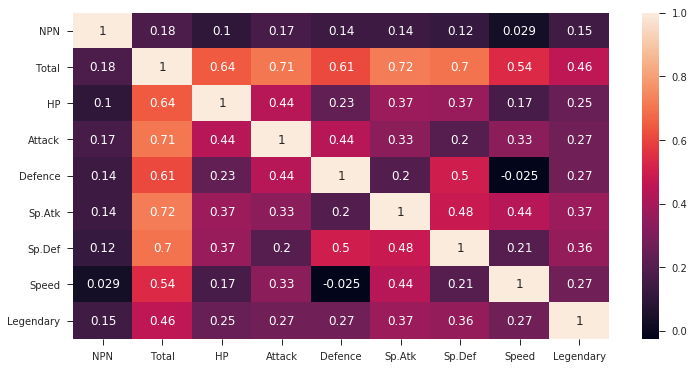

In [1415]:
plt.figure(figsize=(12,6)) 
sns.heatmap(pk.corr(),annot=True) 
plt.show()

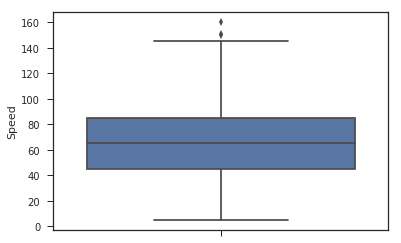

In [1416]:
sns.boxplot(y="Speed", data=pk);

In [1417]:
pk.info()

<class 'pandas.core.frame.DataFrame'>
Index: 807 entries, Bulbasaur to Zenaora
Data columns (total 13 columns):
NPN           807 non-null int64
Pokemon       807 non-null category
Type1         807 non-null category
Type2         403 non-null category
Total         807 non-null int64
HP            807 non-null int64
Attack        807 non-null int64
Defence       807 non-null int64
Sp.Atk        807 non-null int64
Sp.Def        807 non-null int64
Speed         807 non-null int64
Generation    807 non-null category
Legendary     807 non-null bool
dtypes: bool(1), category(4), int64(8)
memory usage: 149.7+ KB


In [1418]:
pk.head()

,NPN,Pokemon,Type1,Type2,Total,HP,Attack,Defence,Sp.Atk,Sp.Def,Speed,Generation,Legendary
Pokemon,,,,,,,,,,,,,
Bulbasaur,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
Venusaur,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
Charmander,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
Charmeleon,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False


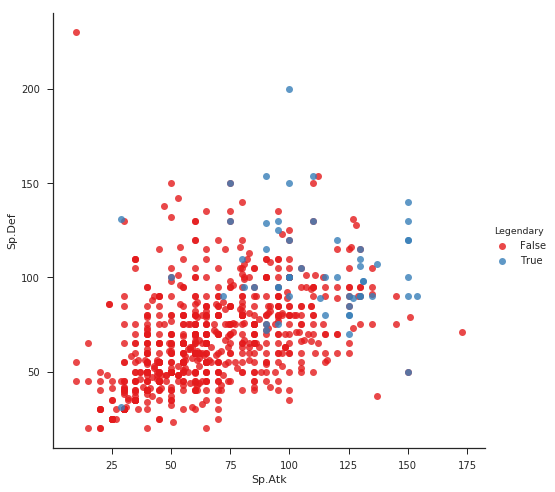

In [1419]:

sns.lmplot(
    x="Sp.Atk",
    y="Sp.Def",
    data=pk,
    size=7,
    fit_reg=False,
    hue='Legendary',
    palette="Set1")

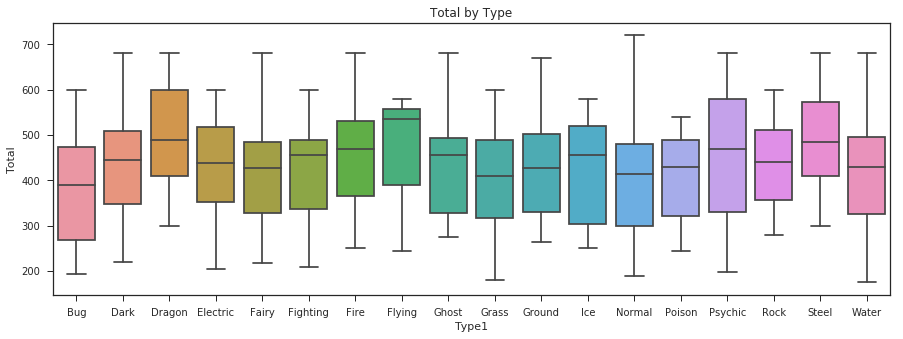

In [1420]:
plt.subplots(figsize = (15,5))
plt.title('Total by Type')
sns.boxplot(x = 'Type1', y= 'Total', data=pk)

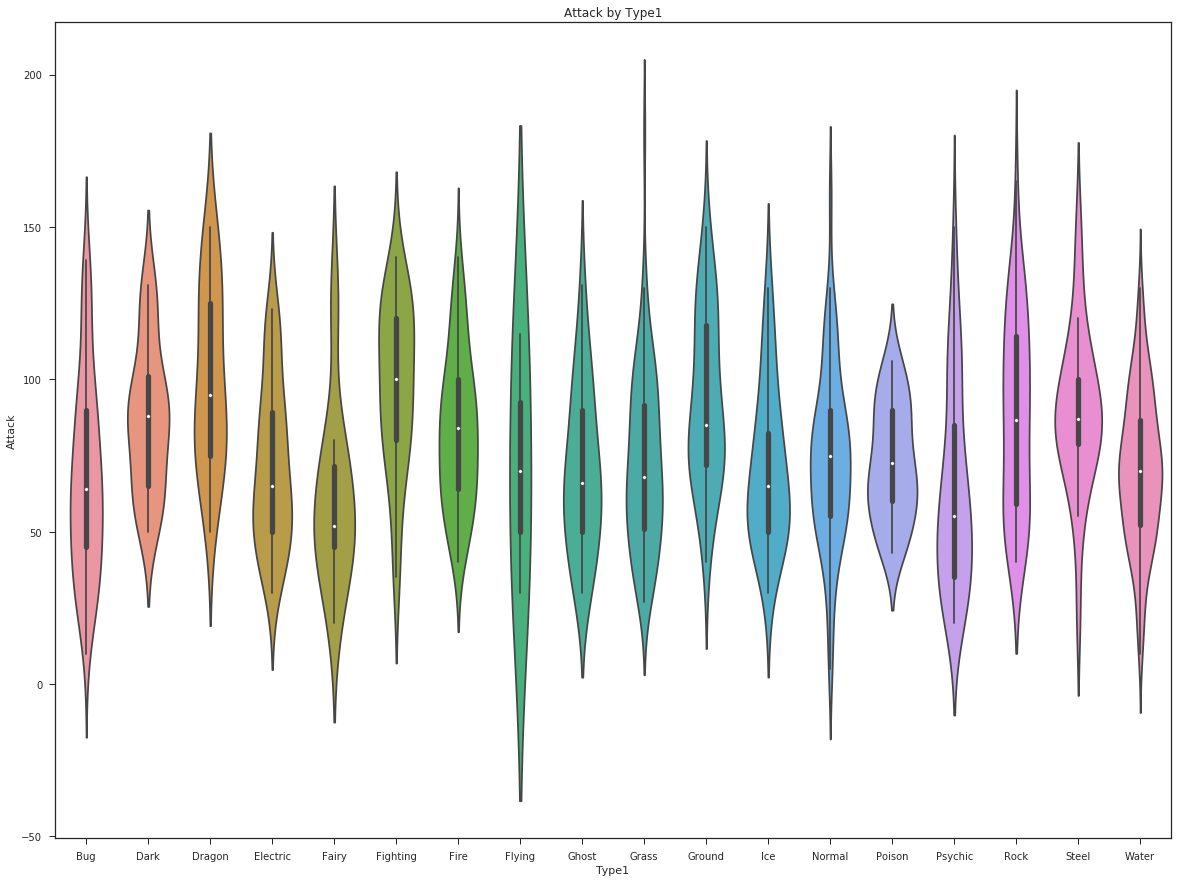

In [1422]:
plt.subplots(figsize = (20,15))
plt.title('Attack by Type1')
sns.violinplot(x = 'Type1', y= 'Attack', data=pk)


In [1423]:
pk.groupby(["Type1", "Attack"]).describe()

 

Defence                                                       \
               count        mean        std    min     25%    50%     75%   
Type1 Attack                                                                
Bug   10         1.0  230.000000        NaN  230.0  230.00  230.0  230.00   
      20         2.0   42.500000  17.677670   30.0   36.25   42.5   48.75   
      22         1.0   60.000000        NaN   60.0   60.00   60.0   60.00   
      25         2.0   45.500000   6.363961   41.0   43.25   45.5   47.75   
      29         1.0   45.000000        NaN   45.0   45.00   45.0   45.00   
      30         3.0   36.333333   5.131601   32.0   33.50   35.0   38.50   
      35         6.0   45.000000  10.000000   30.0   40.00   45.0   53.75   
      40         1.0   85.000000        NaN   85.0   85.00   85.0   85.00   
      45         5.0   54.800000  21.741665   35.0   40.00   50.0   59.00   
      47         2.0   52.500000   3.535534   50.0   51.25   52.5   53.75   
      50         1.0   70.000000        NaN   70.0   70.00   70.0   70.00   
      52         1.0   50.000000        NaN   50.0   50.00   50.0   50.00   
      53         1.0   70.000000        NaN   70.0   70.00   70.0   70.00   
      55         3.0   69.666667  25.890796   50.0   55.00   60.0   79.50   
      59         1.0   85.000000        NaN   85.0   85.00   85.0   85.00   
      60         3.0   55.666667  13.650397   40.0   51.00   62.0   63.50   
      62         1.0   45.000000        NaN   45.0   45.00   45.0   45.00   
      63         1.0   90.000000        NaN   90.0   90.00   90.0   90.00   
      65         4.0   70.000000  21.213203   45.0   56.25   72.5   86.25   
      70         4.0   58.750000  21.746647   40.0   47.50   52.5   63.75   
      73         1.0   55.000000        NaN   55.0   55.00   55.0   55.00   
      75         1.0   45.000000        NaN   45.0   45.00   45.0   45.00   
      76         1.0   86.000000        NaN   86.0   86.00   86.0   86.00   
      77         1.0   60.000000        NaN   60.0   60.00   60.0   60.00   
      80         1.0  102.000000        NaN  102.0  102.00  102.0  102.00   
      82         1.0   95.000000        NaN   95.0   95.00   95.0   95.00   
      85         2.0   53.000000   2.828427   51.0   52.00   53.0   54.00   
      90         5.0   68.000000  41.922548   40.0   45.00   45.0   70.00   
      94         1.0   50.000000        NaN   50.0   50.00   50.0   50.00   
      95         2.0  102.500000  31.819805   80.0   91.25  102.5  113.75   
...              ...         ...        ...    ...     ...    ...     ...   
Water 64         1.0   85.000000        NaN   85.0   85.00   85.0   85.00   
      65         9.0   63.777778  22.465406   35.0   55.00   64.0   65.00   
      66         1.0   68.000000        NaN   68.0   68.00   68.0   68.00   
      67         1.0   60.000000        NaN   60.0   60.00   60.0   60.00   
      69         2.0   72.500000   4.949747   69.0   70.75   72.5   74.25   
      70         6.0   65.333333  20.510160   35.0   53.75   67.5   77.50   
      72         1.0   90.000000        NaN   90.0   90.00   90.0   90.00   
      73         1.0   88.000000        NaN   88.0   88.00   88.0   88.00   
      74         1.0   74.000000        NaN   74.0   74.00   74.0   74.00   
      75         8.0   90.000000  20.701967   60.0   78.75   82.5  111.25   
      78         2.0   88.000000  21.213203   73.0   80.50   88.0   95.50   
      80         3.0   75.000000   8.660254   65.0   72.50   80.0   80.00   
      82         1.0   78.000000        NaN   78.0   78.00   78.0   78.00   
      83         2.0   84.000000  22.627417   68.0   76.00   84.0   92.00   
      84         1.0  105.000000        NaN  105.0  105.00  105.0  105.00   
      85         3.0   78.333333   7.637626   70.0   75.00   80.0   82.50   
      86         1.0   88.000000        NaN   88.0   88.00   88.0   88.00   
      87         1.0   63.000000        NaN   63.0   63.00   63.0   63.00   
      90 

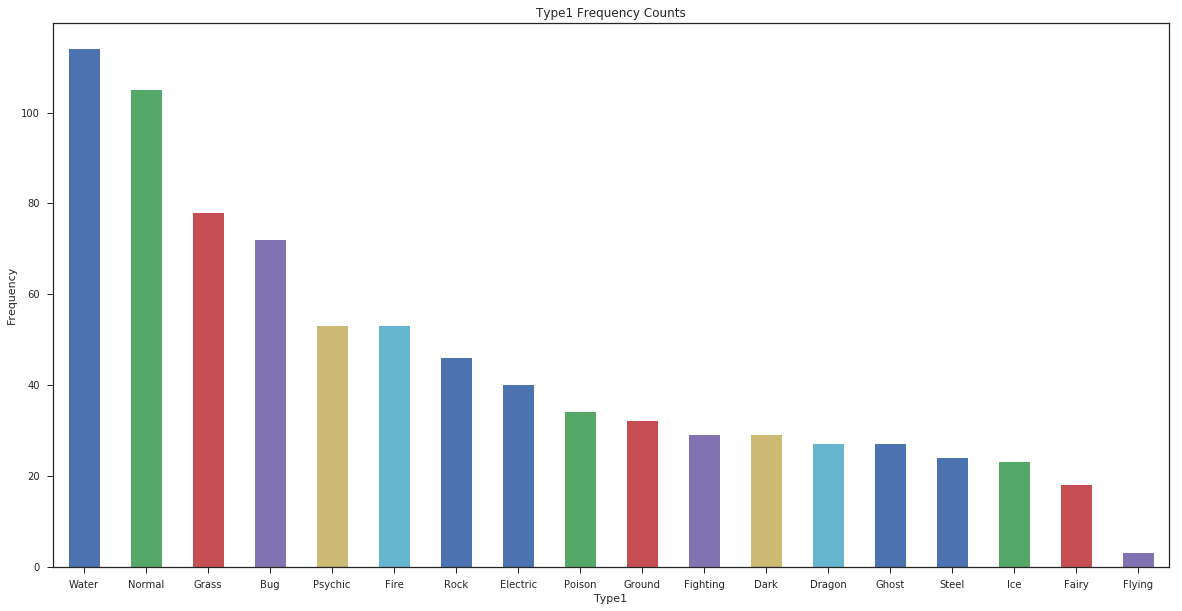

In [1424]:
counts = pk['Type1'].value_counts()
fig = plt.figure(figsize=(20, 10))
ax = counts.plot.bar(rot=0)
ax.set_title('Type1 Frequency Counts') 
ax.set_xlabel('Type1') 
ax.set_ylabel('Frequency')

In [1425]:
mode = pk['Type1'].mode()[0]


In [1427]:
pk.dtypes.value_counts()

int64       8
category    2
category    1
bool        1
category    1
dtype: int64

In [1428]:
pk['Sp.Atk'].describe()

count    807.000000
mean      69.517968
std       29.538163
min       10.000000
25%       45.000000
50%       65.000000
75%       90.000000
max      173.000000
Name: Sp.Atk, dtype: float64

In [1429]:
pk['Sp.Def'].describe()

count    807.000000
mean      69.815366
std       27.132144
min       20.000000
25%       50.000000
50%       65.000000
75%       85.000000
max      230.000000
Name: Sp.Def, dtype: float64

In [1430]:
pk['HP'].describe()

count    807.000000
mean      68.612144
std       26.016353
min        1.000000
25%       50.000000
50%       65.000000
75%       80.000000
max      255.000000
Name: HP, dtype: float64

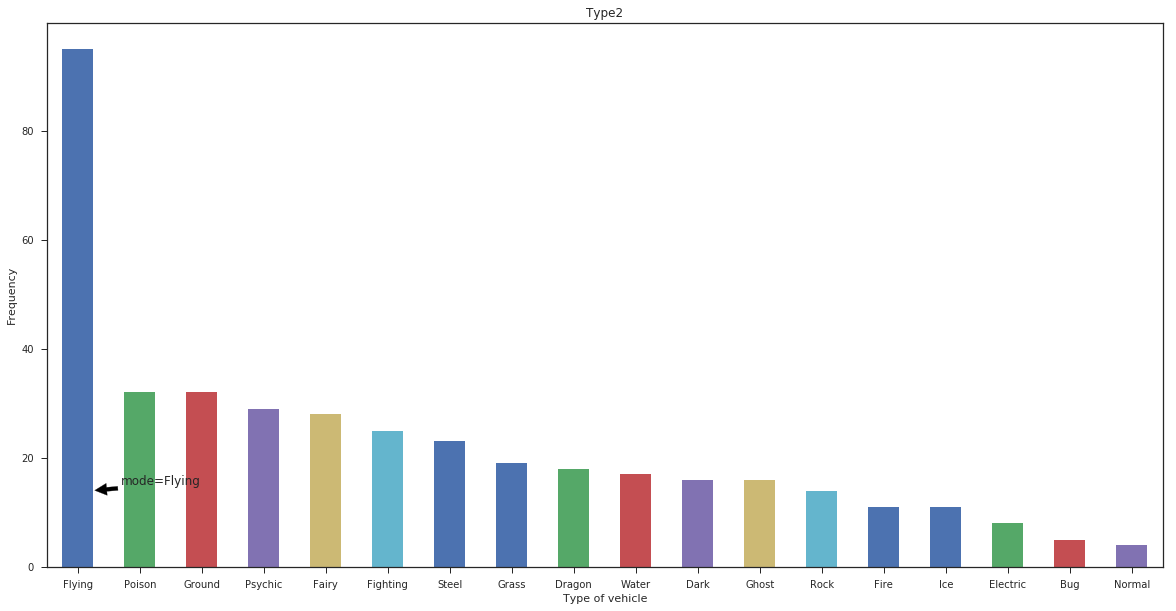

In [1432]:

fig = plt.figure(figsize=(20, 10))
counts = pk['Type2'].value_counts()
# Plot the counts as a bar chart.
ax = counts.plot.bar(rot=0)
ax.set_title('Type2') 
ax.set_xlabel('')
ax.set_ylabel('Frequency')
# Find the mode so we can label it on the plot.
mode = pk['Type2'].mode()[0]
# Find the index of the mode in the plot.
mode_pos = counts.index.get_loc(mode) 
ax.annotate('mode={}'.format(mode), 
            xy=(mode_pos + 0.25, 14),
            xytext=(mode_pos + 0.7, 15),
            arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()

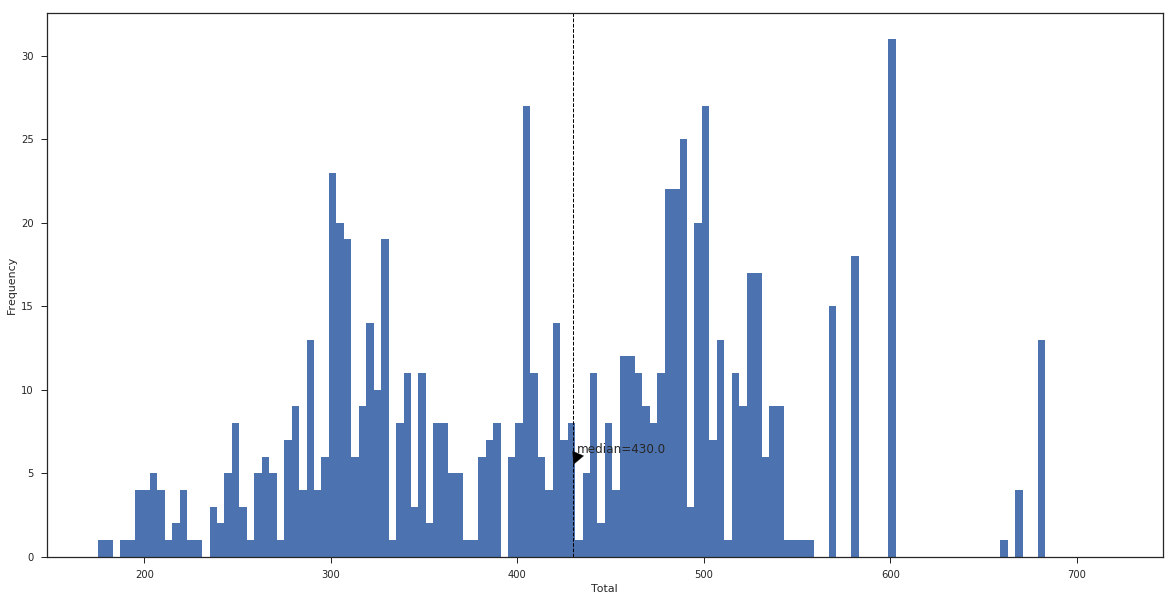

In [1433]:
fig = plt.figure(figsize=(20, 10))
bins = 40
bins = np.arange(pk['Total'].min(),
                 pk['Total'].max() + 1, 4)
ax = pk['Total'].plot.hist(bins=bins)
ax.set_title('')
ax.set_xlabel('Total')
ax.set_ylabel('Frequency')
median = pk['Total'].median()
ax.axvline(median, color='black',
           linestyle='dashed', linewidth=1)
ax.annotate('median={:0.1f}'.format(median),
            xy=(median, 5.5),
            xytext=(median + 2, 6.2),
            arrowprops=dict(facecolor='black',
                            shrink=0.05))
plt.show()

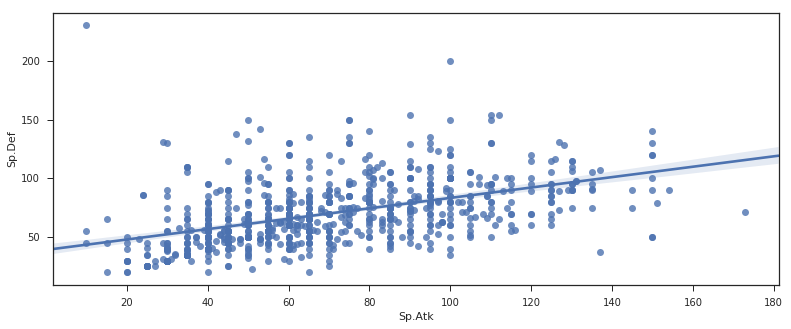

In [1437]:
sns.set_style()  
plt.figure(figsize=(13, 5))
sns.regplot(
    x="Sp.Atk", y="Sp.Def", data=pk,
    fit_reg=True)  

In [1449]:
toppk=pk.sort_values(by='Total', ascending=False) #sorting the rows in descending order

toppk.head(15)

,Number,Name,Type1,Type2,Total,HP,Attack,Defense,SpecialAtk,SpecialDef,Speed,Generation,Legendary
426,384,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
164,150,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True
424,383,GroudonPrimal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True
422,382,KyogrePrimal Kyogre,Water,NaN,770,100,150,90,180,160,90,3,True
886,800,NecrozmaUltra,Psychic,Dragon,754,97,167,97,167,97,129,7,True
552,493,Arceus,Normal,NaN,720,120,120,120,120,120,120,4,True
712,646,KyuremWhite Kyurem,Dragon,Ice,700,125,120,90,170,100,95,5,True
494,445,GarchompMega Garchomp,Dragon,Ground,700,108,170,115,120,95,92,4,False
420,381,LatiosMega Latios,Dragon,Psychic,700,80,130,100,160,120,110,3,True


# Bibliography
#### https://www.kaggle.com (accessed december 12)
#### https://seaborn.pydata.org/tutorial.html (accessed december 12)
#### https://elitedatascience.com/python-seaborn-tutorial (accessed december 11)